# <center>Centro Universitário Facens<br/></center>
<font size="4"><center><b>Disciplina: Big Data</b></center></font>
  
<font size="3"><center>Prof. Fabrício Torquato</center></font>

# <center>Avaliação Continuada 2 (AC2)</center>
## <center>Dataset escolhido: Yelp Dataset</center>


----
#### <center>RA, Turma e nome dos componentes do grupo</center>

    
| RA       | Turma        |           Nome            |
|:-        |:-            |:-------------------------:|
|  210167  |  CP905TIN1   | Caio Reis Despontin       |
|  210052  |  CP905TIN1   | João Pedro Santos Batista |
|  210037  |  CP905TIN1   | Vinicius Gonçalves Angelo |
|  210411  |  CP905TIN1   | Vinicius Ribeiro Silva    |

----

O dataset escolhido contém avaliações e informações sobre empresas listadas na plataforma **Yelp**, que é um **site de recomendações** de restaurantes, bares, lojas e outros estabelecimentos.

# Possui 5 arquivos JSON:
1.   **yelp_academic_dataset_business.json**
→ Informações sobre empresas (nome, localização, categorias, estrelas médias, etc.)

2.   **yelp_academic_dataset_review.json**
→ Avaliações escritas, nota de 1 a 5 estrelas, data e ID do usuário/empresa.

3.   **yelp_academic_dataset_user.json**
→ Informações sobre os usuários, incluindo reviews escritos, número de amigos, etc.

4.   **yelp_academic_dataset_checkin.json**
→ Dados de check-ins feitos nos estabelecimentos

5.   **yelp_academic_dataset_tip.json**
→ Dicas rápidas deixadas pelos usuários.

# Arquivo escolhido: Review
## Classificar Sentimento das Reviews
- Classe Alvo: Sentimento da review.
- Base principal: review.json (com as notas de 1 a 5).
- Pré-processamento: transformar notas em classes.
----

# Construção do Ambiente Apache de Big Data
Nesta primeira parte do projeto, foi realizado a simulação de um ambiente de Big Data utilizando ferramentas do ecossistema Apache.

Para isso, foram utilizados Docker e Docker Compose para orquestrar contêineres contendo os principais componentes de uma infraestrutura distribuída de Big Data:

- NameNode e DataNode para formar o sistema de arquivos distribuído (HDFS).
- Hive configurado para organização dos dados no HDFS.
- O ambiente está preparado para integração com o Apache Spark, utilizado nas próximas etapas do projeto para processamento e modelagem preditiva.

### Ações executadas:
- Subir os serviços com docker-compose, ativando os contêineres de Hadoop e Hive.
- Criar o diretório `/user/hive/warehouse/yelp` no HDFS.
- Transferir o dataset real em json para dentro de um dos contêineres.
- Subir o arquivo para o HDFS e validar a sua existência `hadoop fs -cat`.
- O ambiente encontra-se funcional, preparado para leitura e análise dos dados via Spark.

Esse processo garantiu um ambiente de Big Data completo, funcional e replicável, com o objetivo de viabilizar o processamento distribuído de dados em larga escala.

#### Carregando o dataset (utilizando token do Kaggle)

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jpsbat","key":"59c7ba999fb6f8828343e6d2ed42cf63"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi
import os

api = KaggleApi()
api.authenticate()

download_path = "/content/yelp_data"
os.makedirs(download_path, exist_ok=True)

api.dataset_download_files('yelp-dataset/yelp-dataset', path=download_path, unzip=True)

Dataset URL: https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Yelp Dataset in Colab") \
    .getOrCreate()

df = spark.read.json("/content/yelp_data/yelp_academic_dataset_review.json")

In [ ]:
import os

file_path = "/content/yelp_data/yelp_academic_dataset_review.json"

file_size_bytes = os.path.getsize(file_path)
file_size_mb = file_size_bytes / (1024 * 1024)
file_size_gb = file_size_bytes / (1024 ** 3)

print(f"Tamanho do arquivo em bytes: {file_size_bytes}")
print(f"Tamanho do arquivo em MB: {file_size_mb:.2f} MB")

Tamanho do arquivo em bytes: 5341868833
Tamanho do arquivo em MB: 5094.40 MB


#### Exibindo o dataset

In [ ]:
df.show()

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ...|     1|OyoGAe7OKpv6SyGZT...|
|YjUWPpI6HXG530lwP...|   0|2014-02-05 20:30:30|    0|saUsX_uimxRlCVr67...|  3.0|Family diner. Had...|     0|8g_iMtfSiwikVnbP2...|
|kxX2SOes4o-D3ZQBk...|   1|2015-01-04 00:01:03|    0|AqPFMleE6RsU23_au...|  5.0|Wow!  Yummy, diff...|     1|_7bHUi9Uuf5__HHc_...|
|e4Vwtrqf-wpJfwesg...|   1|2017-01-14 20:54:15|    0|Sx8TMOWLNuJBWer-0...|  4.0|Cute inter

In [ ]:
num_linhas = df.count()
print(f"Número de linhas no DataFrame: {num_linhas}")

Número de linhas no DataFrame: 6990280


In [ ]:
# Printando o esquema
df.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



# Análise Exploratória de Dados

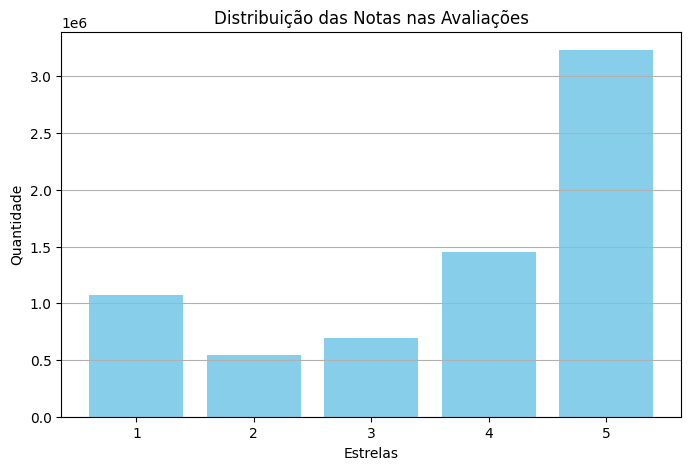

In [ ]:
# Esse gráfico ajuda a entender se há desequilíbrio de classes (por exemplo, se há muitas avaliações com 5 estrelas e poucas com 1 estrela)

import matplotlib.pyplot as plt

# Conta quantas reviews para cada valor de estrela
stars_dist = df.groupBy("stars").count().orderBy("stars").collect()

# Separa os valores para plotagem
stars_vals = [row['stars'] for row in stars_dist]
stars_counts = [row['count'] for row in stars_dist]

plt.figure(figsize=(8, 5))
plt.bar(stars_vals, stars_counts, color="skyblue")
plt.title("Distribuição das Notas nas Avaliações")
plt.xlabel("Estrelas")
plt.ylabel("Quantidade")
plt.grid(True, axis='y')
plt.show()

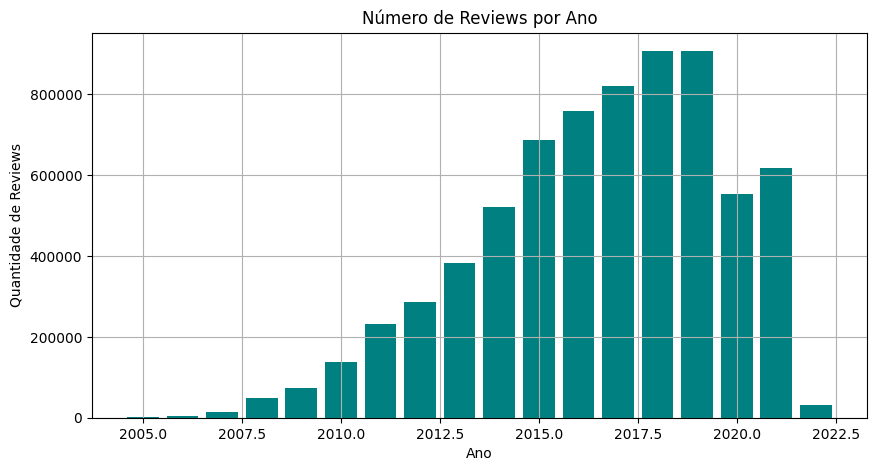

In [ ]:
# Esse gráfico mostra como o uso da plataforma evoluiu ao longo dos anos. Pode indicar aumento no número de usuários e atividade da comunidade

from pyspark.sql.functions import year

reviews_ano = df.withColumn("ano", year("date")) \
                       .groupBy("ano").count() \
                       .orderBy("ano") \
                       .collect()

anos = [row['ano'] for row in reviews_ano]
contagens = [row['count'] for row in reviews_ano]

plt.figure(figsize=(10, 5))
plt.bar(anos, contagens, color="teal")
plt.title("Número de Reviews por Ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Reviews")
plt.grid(True)
plt.show()

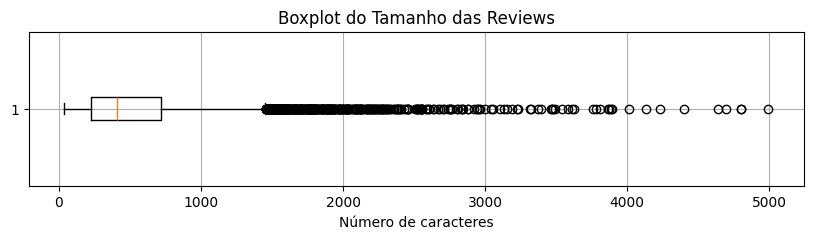

In [ ]:
# O boxplot ajuda a encontrar se há avaliações muito curtas ou excessivamente longas, que podem ser tratadas como outliers no modelo.
from pyspark.sql.functions import length

df_with_length = df.withColumn("text_length", length("text"))

amostra = df_with_length.select("text_length").sample(False, 0.001, seed=42).rdd.map(lambda row: row["text_length"]).collect()

plt.figure(figsize=(10, 2))
plt.boxplot(amostra, vert=False)
plt.title("Boxplot do Tamanho das Reviews")
plt.xlabel("Número de caracteres")
plt.grid(True)
plt.show()

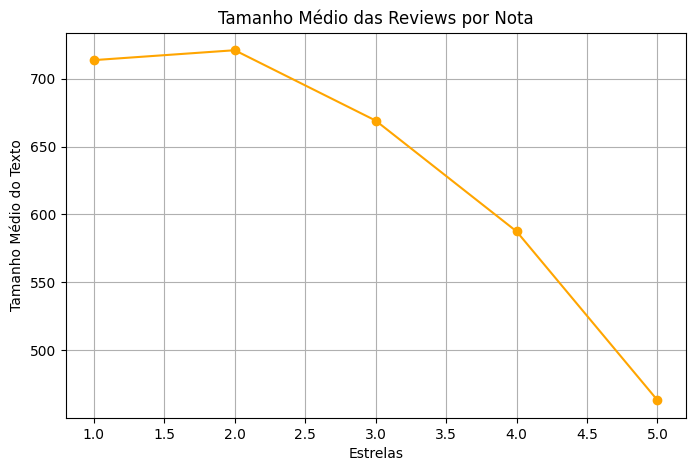

In [ ]:
# Este gráfico pode ser bom para entender se pessoas que deram notas ruins escrevem mais ou menos do que as que deram boas notas.
media_por_estrela = df_with_length.groupBy("stars") \
    .avg("text_length") \
    .orderBy("stars") \
    .collect()

stars = [row["stars"] for row in media_por_estrela]
medias = [row["avg(text_length)"] for row in media_por_estrela]

plt.figure(figsize=(8, 5))
plt.plot(stars, medias, marker='o', color="orange")
plt.title("Tamanho Médio das Reviews por Nota")
plt.xlabel("Estrelas")
plt.ylabel("Tamanho Médio do Texto")
plt.grid(True)
plt.show()

In [ ]:
# Verificar colunas com valores nulos
from pyspark.sql.functions import col, isnan, count, when

# Conta os valores nulos ou vazios por coluna
df.select([
    count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df.columns
]).show()

+-----------+----+----+-----+---------+-----+----+------+-------+
|business_id|cool|date|funny|review_id|stars|text|useful|user_id|
+-----------+----+----+-----+---------+-----+----+------+-------+
|          0|   0|   0|    0|        0|    0|   0|     0|      0|
+-----------+----+----+-----+---------+-----+----+------+-------+



In [ ]:
# Verificar se existem registros duplicados inteiros
df.count(), df.dropDuplicates().count()

(6990280, 6990280)

In [ ]:
# Verifica se existe review_id duplicado (deveria ser único)
df.groupBy("review_id").count().filter("count > 1").show()

+---------+-----+
|review_id|count|
+---------+-----+
+---------+-----+



In [ ]:
# Contar valores únicos para algumas colunas
for col_name in ["user_id", "business_id", "stars"]:
    print(f"{col_name} - valores únicos:", df.select(col_name).distinct().count())

user_id - valores únicos: 1987929
business_id - valores únicos: 150346
stars - valores únicos: 5


## Conclusões da EDA
1. Distribuição das Notas
- O gráfico mostra um **desequilíbrio de classes**, com uma concentração nas avaliações de 5 estrelas.
- Isso é comum em plataformas como o Yelp, onde usuários tendem a avaliar positivamente quando estão satisfeitos.
- Esse desequilíbrio precisa ser considerado na etapa de classificação, pois pode causar viés do modelo.

2. Reviews por Ano
- Observa-se um crescimento no uso da plataforma até o pico em 2016–2018.
- Após 2018, há uma leve queda que pode estar relacionada à pandemia em 2020.
- Esse padrão mostra engajamento crescente ao longo do tempo, o que valida o uso da base para prever padrões futuros.

3. Outliers no Tamanho das Reviews
- Existem outliers significativos acima de 1500 caracteres, chegando a mais de 5000.
- Essas reviews longas são casos raros e podem ser tratados separadamente ou truncados.

4. Tamanho das Reviews por Nota
- Não há grandes diferenças no tamanho médio dos textos entre diferentes notas.
- Ou seja, avaliar se a review é positiva ou negativa não depende diretamente do tamanho do texto.

5. Duplicatas e valores ausentes
- Não foram encontrados valores nulos ou ausentes em nenhuma coluna
- Não há registros duplicados completos
- Todos os review_id são únicos, como esperado
- Há alta diversidade de usuários e negócios. A variável stars tem 5 categorias distintas (1 a 5).

# Processamento de dados

----
Reduzindo o volume de dados com um filtro temporal (apenas reviews de 2018) e manter apenas reviews com 1, 3 e 5 estrelas.

In [ ]:
from pyspark.sql.functions import year, col

df_filtered = df.withColumn("year", year("date")) \
    .filter((col("year") == 2018) & (col("stars").isin([1, 3, 5])))

In [ ]:
df_filtered.select("stars").groupBy("stars").count().show()

+-----+------+
|stars| count|
+-----+------+
|  1.0|148425|
|  3.0| 77119|
|  5.0|456027|
+-----+------+



In [ ]:
df_ml = df_filtered.select(col("text"), col("stars").alias("label"))

In [ ]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF
from pyspark.ml import Pipeline

# Tokenização
tokenizer = Tokenizer(inputCol="text", outputCol="words")

# Remover stopwords
remover = StopWordsRemover(inputCol="words", outputCol="filtered")

# Vetorização com TF
hashingTF = HashingTF(inputCol="filtered", outputCol="rawFeatures", numFeatures=10000)

# Aplicar IDF para reponderar as palavras
idf = IDF(inputCol="rawFeatures", outputCol="features")

# Pipeline de pré-processamento
pipeline = Pipeline(stages=[tokenizer, remover, hashingTF, idf])
model_pipeline = pipeline.fit(df_ml)
df_transformed = model_pipeline.transform(df_ml)

# Visualizar resultado final com features vetorizadas
df_transformed.select("label", "features").show(5)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  3.0|(10000,[92,129,27...|
|  5.0|(10000,[416,524,1...|
|  5.0|(10000,[44,750,19...|
|  5.0|(10000,[815,1930,...|
|  1.0|(10000,[55,248,12...|
+-----+--------------------+
only showing top 5 rows



----
## Resumo da Situação Atual
- Texto da avaliação (text), já vetorizado com TF-IDF.
- Nota (stars), com 3 classes: 1, 3 e 5.
- Dataset filtrado: Apenas o ano de 2018.

- Distribuição das classes:
-- 1 estrela: 148425
-- 3 estrelas: 77119
-- 5 estrelas: 456027

----
Aqui há um desbalanceamento de classes, então será usada uma abordagem que mantém os dados existentes e amplia as classes minoritárias:

- Oversampling: Duplicar exemplos das classes 1.0 e 3.0 para equilibrar com a classe 5.0

# Modelagem

In [ ]:
df_5 = df_transformed.filter(col("label") == 5.0)

df_1 = df_transformed.filter(col("label") == 1.0)
df_3 = df_transformed.filter(col("label") == 3.0)

df_1_oversampled = df_1.union(df_1)
df_3_oversampled = df_3.union(df_3)

df_balanced = df_1_oversampled.union(df_3_oversampled).union(df_5)

df_balanced.groupBy("label").count().show()

+-----+------+
|label| count|
+-----+------+
|  1.0|296850|
|  3.0|154238|
|  5.0|456027|
+-----+------+



In [ ]:
# 80% treino, 20% teste
train_data, test_data = df_balanced.randomSplit([0.8, 0.2], seed=42)

## Regressão Logística

In [ ]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol="features", labelCol="label", maxIter=20, regParam=0.1)

# Treinar
lr_model = lr.fit(train_data)

# Avaliar
lr_predictions = lr_model.transform(test_data)

## Naive Bayes

In [ ]:
from pyspark.ml.classification import NaiveBayes

nb = NaiveBayes(featuresCol="features", labelCol="label", smoothing=1.0, modelType="multinomial")

# Treinar
nb_model = nb.fit(train_data)

# Avaliar
nb_predictions = nb_model.transform(test_data)

## Avaliação

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

# Acurácia
lr_accuracy = evaluator.evaluate(lr_predictions)
nb_accuracy = evaluator.evaluate(nb_predictions)


print("Acurácia Regressão Logística:", lr_accuracy)
print("Acurácia Naive Bayes:", nb_accuracy)

Acurácia Regressão Logística: 0.8670150185315091
Acurácia Naive Bayes: 0.06280828311506106


----
# **Conclusão e Considerações Finais**
Neste projeto, realizamos uma tarefa de classificação utilizando o **Yelp Dataset**, focando nas avaliações textuais dos usuários, com o objetivo de prever a quantidade de estrelas atribuídas (1, 3 ou 5) com base apenas no conteúdo textual.


- Foram treinados dois modelos de aprendizado de máquina:
  - **Regressão Logística**, que alcançou uma acurácia de **86.7%**, mostrando ótima performance na tarefa proposta.
  - **Naive Bayes**, que teve desempenho muito inferior (**6.3%**), provavelmente por não lidar bem com a estrutura dos vetores TF-IDF no cenário específico, já que esse modelo assume independência entre atributos — o que raramente é o caso em representações textuais complexas.

---

### **Conclusão Final**

Através deste estudo, conseguimos demonstrar como técnicas de Big Data, análise textual e aprendizado de máquina podem ser aplicadas em conjunto para resolver problemas reais com grandes volumes de dados. O pipeline criado serve como base para aplicações mais complexas no mundo real, como análise de sentimento automatizada, moderação de conteúdo e sistemas de recomendação.